In [1]:
import pandas as pd 
df=pd.read_csv('combined_dataset.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56911 entries, 0 to 56910
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   56911 non-null  object 
 1   Name                          56911 non-null  object 
 2   age                           56911 non-null  int64  
 3   gender                        56911 non-null  object 
 4   security_no                   56911 non-null  object 
 5   region_category               48535 non-null  object 
 6   membership_category           56911 non-null  object 
 7   joining_date                  56911 non-null  object 
 8   joined_through_referral       56911 non-null  object 
 9   referral_id                   56911 non-null  object 
 10  preferred_offer_types         56464 non-null  object 
 11  medium_of_operation           56911 non-null  object 
 12  internet_option               56911 non-null  object 
 13  l

In [2]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,56911.000000,56911.000000,56911.000000,56911.000000,51505.000000,36992.000000
mean,37.036355,-40.970902,243.704243,29287.618994,686.563762,3.463397
std,15.885146,226.896073,400.262304,19466.710286,193.398290,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,59.830000,14195.630000,615.970000,3.000000
50%,37.000000,12.000000,161.620000,27560.380000,697.820000,4.000000
75%,51.000000,16.000000,355.460000,40896.595000,764.280000,5.000000
max,64.000000,26.000000,3350.060000,99995.030000,2069.069761,5.000000


In [3]:
df.isnull().sum()

customer_id                         0
Name                                0
age                                 0
gender                              0
security_no                         0
region_category                  8376
membership_category                 0
joining_date                        0
joined_through_referral             0
referral_id                         0
preferred_offer_types             447
medium_of_operation                 0
internet_option                     0
last_visit_time                     0
days_since_last_login               0
avg_time_spent                      0
avg_transaction_value               0
avg_frequency_login_days            0
points_in_wallet                 5406
used_special_discount               0
offer_application_preference        0
past_complaint                      0
complaint_status                    0
feedback                            0
churn_risk_score                19919
dataset                             0
dtype: int64

In [4]:
df.columns=df.columns.str.lower()
df.columns

Index(['customer_id', 'name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'dataset'],
      dtype='object')

--> Droping out the irrelevanet columns:like-name,last_visit_time,security_no 

In [7]:
df.drop(['name','last_visit_time','security_no'],axis=1,inplace=True)
df.head()

,customer_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,dataset
0,fffe4300490044003600300030003800,18,F,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0,train
1,fffe43004900440032003100300035003700,32,F,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,...,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1.0,train
2,fffe4300490044003100390032003600,44,F,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0,train
3,fffe43004900440036003000330031003600,37,M,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0,train
4,fffe43004900440031003900350030003600,31,F,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5.0,train


--> convert_the customer_id encoded to hex:

In [8]:
def hex_to_id(hex_string):
    try: 
        byte_data=bytes.fromhex(hex_string)
        decoded_str=byte_data.decode('utf-16').strip()
        
        return decoded_str
    except(ValueError,UnicodeDecodeError) as e:
        print(f"Error{hex_string}:{e}")
        return None
df['customer_id']=df['customer_id'].apply(hex_to_id)
df.head()

,customer_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,dataset
0,CID6008,18,F,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0,train
1,CID21057,32,F,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,...,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1.0,train
2,CID1926,44,F,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0,train
3,CID60316,37,M,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0,train
4,CID19506,31,F,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5.0,train


In [9]:
print(df['age'].dtype)

int64


-->get the count of duplicate columns in each column

In [10]:
unique_duplicate_counts = {}

for col in df.columns:
    value_counts = df[col].value_counts()
    unique_duplicates = value_counts[value_counts > 1]
    unique_duplicate_counts[col] = len(unique_duplicates)

unique_duplicate_counts

{'customer_id': 0,
 'age': 55,
 'gender': 3,
 'region_category': 3,
 'membership_category': 6,
 'joining_date': 1096,
 'joined_through_referral': 3,
 'referral_id': 7362,
 'preferred_offer_types': 3,
 'medium_of_operation': 4,
 'internet_option': 3,
 'days_since_last_login': 27,
 'avg_time_spent': 10408,
 'avg_transaction_value': 274,
 'avg_frequency_login_days': 31,
 'points_in_wallet': 11580,
 'used_special_discount': 2,
 'offer_application_preference': 2,
 'past_complaint': 2,
 'complaint_status': 5,
 'feedback': 9,
 'churn_risk_score': 6,
 'dataset': 2}

-->assign unique row indentifier fror the customer_id

In [13]:
df['ID']=range(1,len(df)+1)
df.head()

,customer_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,dataset,ID
0,CID6008,18,F,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0,train,1
1,CID21057,32,F,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,...,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1.0,train,2
2,CID1926,44,F,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0,train,3
3,CID60316,37,M,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0,train,4
4,CID19506,31,F,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5.0,train,5


In [14]:
uni_gender=df['gender'].unique()
print(uni_gender)
gender_count=df['gender'].value_counts()
gender_count

['F' 'M' 'Unknown']


F          28462
M          28354
Unknown       95
Name: gender, dtype: int64

In [16]:
uni_reg=df['region_category'].unique()
print(uni_reg)
reg_count=df['region_category'].value_counts()
print(reg_count)
no_null=df['region_category'].isnull().sum()
print(no_null)

['Village' 'City' 'Town' nan]
Town       21763
City       19529
Village     7243
Name: region_category, dtype: int64
8376


-->fill the null values with 'unknown' in the region_category as it a categorical variable

In [17]:
df['region_category']=df['region_category'].fillna('unknown')
import numpy as np
total_cou=len(df)
val_count=df['region_category'].value_counts()
percent=(val_count/total_cou)*100
percentage=percent.round(2)
percentage

Town       38.24
City       34.31
unknown    14.72
Village    12.73
Name: region_category, dtype: float64

-->check for the duplicates in the membership_catgory column and then get the percentage of each unqiue entry

In [18]:
uni_mem=df['membership_category'].unique()
print(uni_mem)
mem_count=df['membership_category'].value_counts()
total_count=len(df)
val1_count=df['membership_category'].value_counts(dropna=False)
percent_mem=(val1_count/total_count)*100
percentage_mem=percent_mem.round(2)
print(mem_count,percentage_mem)

['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
No Membership          11815
Basic Membership       11808
Gold Membership        10545
Silver Membership       9187
Premium Membership      6820
Platinum Membership     6736
Name: membership_category, dtype: int64 No Membership          20.76
Basic Membership       20.75
Gold Membership        18.53
Silver Membership      16.14
Premium Membership     11.98
Platinum Membership    11.84
Name: membership_category, dtype: float64


--> get the duplicates count for the joined_through_referral and replace the '?' with No which have the corresponding value 'xxxxxxxx' in the referral_id column

In [19]:
join_count=df['joined_through_referral'].value_counts()
print(join_count)
count_xx=(df['referral_id']=='xxxxxxxx').sum()
print(count_xx)
def update_ref(row):
    if row['joined_through_referral']=='?':
        if row['referral_id']=='xxxxxxxx':
            return 'No'
        else:
            return 'Yes'
    return row['joined_through_referral']
df['joined_through_referral']=df.apply(update_ref,axis=1)

Yes    24332
No     24143
?       8436
Name: joined_through_referral, dtype: int64
27300


In [20]:
count_yes_xxxxxxxx = ((df['joined_through_referral'] == 'Yes') & (df['referral_id'] == 'xxxxxxxx')).sum()
print(count_yes_xxxxxxxx)

2286


-->replace the 'xxxxxxxx' with 'unknown' if it has corresponding value as'Yes' 
-->replace the 'xxxxxxxx' with 'not applicable' if it has corresponding value as'No'

In [21]:
def upd_ref(row):
    if row['referral_id'] == 'xxxxxxxx':
        if row['joined_through_referral'] == 'Yes':
            return 'unknown'
        elif row['joined_through_referral']=='No':
            return 'not applicable'
        else: 
            return row['referral_id']
    return row['referral_id']

df['referral_id'] = df.apply(upd_ref, axis=1)

In [22]:
count_yes_xxxxxxxx = ((df['joined_through_referral'] == 'Yes') & (df['referral_id'] == 'xxxxxxxx')).sum()
print(count_yes_xxxxxxxx)

0


-->check if the 'xxxxxxxx' are replaced completely with 'unknown' and 'not applicable' 

In [23]:
count_yes_unk = ((df['joined_through_referral'] == 'Yes') & (df['referral_id'] == 'unknown')).sum()
print(count_yes_unk)

2286


In [24]:
count_no_not = ((df['joined_through_referral'] == 'No') & (df['referral_id'] == 'not applicable')).sum()
print(count_no_not)

25014


In [25]:
df.head(10)

,customer_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,dataset,ID
0,CID6008,18,F,Village,Platinum Membership,2017-08-17,No,not applicable,Gift Vouchers/Coupons,?,...,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0,train,1
1,CID21057,32,F,City,Premium Membership,2017-08-28,Yes,CID21329,Gift Vouchers/Coupons,Desktop,...,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1.0,train,2
2,CID1926,44,F,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0,train,3
3,CID60316,37,M,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0,train,4
4,CID19506,31,F,City,No Membership,2017-09-12,No,not applicable,Credit/Debit Card Offers,Smartphone,...,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5.0,train,5
5,CID63253,13,M,City,Gold Membership,2016-01-08,No,not applicable,Gift Vouchers/Coupons,?,...,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,3.0,train,6
6,CID11679,21,M,Town,Gold Membership,2015-03-19,Yes,CID24708,Gift Vouchers/Coupons,Desktop,...,28.0,756.21,Yes,No,Yes,Solved in Follow-up,No reason specified,3.0,train,7
7,CID8058,42,M,unknown,No Membership,2016-07-12,Yes,CID56614,Credit/Debit Card Offers,Both,...,24.0,568.08,No,Yes,Yes,Unsolved,Poor Product Quality,5.0,train,8
8,CID33322,44,M,Village,Silver Membership,2016-12-14,No,not applicable,Without Offers,Smartphone,...,20.0,NaN,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,3.0,train,9
9,CID20483,45,F,Town,No Membership,2016-11-30,No,not applicable,Gift Vouchers/Coupons,?,...,28.0,706.23,No,Yes,Yes,No Information Available,Poor Customer Service,4.0,train,10


-->Get the count of duplicate values in preferred_offer_types and fill the null values with 'unknown' then get percentage for    each unique entry of preferred_offer_types columns 

In [26]:
offer_type_count=df['preferred_offer_types'].value_counts()
print(offer_type_count)
df['preferred_offer_types'].fillna('unknown',inplace=True)
offer_type_count=df['preferred_offer_types'].value_counts()
print(offer_type_count)
val_cou=df['preferred_offer_types'].value_counts(dropna=False)
percent_off=(val_cou/total_count)*100
percentage_off=percent_off.round(2)
print(percentage_off)

Credit/Debit Card Offers    18876
Gift Vouchers/Coupons       18844
Without Offers              18744
Name: preferred_offer_types, dtype: int64
Credit/Debit Card Offers    18876
Gift Vouchers/Coupons       18844
Without Offers              18744
unknown                       447
Name: preferred_offer_types, dtype: int64
Credit/Debit Card Offers    33.17
Gift Vouchers/Coupons       33.11
Without Offers              32.94
unknown                      0.79
Name: preferred_offer_types, dtype: float64


--> Tried to get the correlation between preferred_offer_types and 'membership'

In [27]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['preferred_offer_types'], df['membership_category'])

# Calculate Chi-squared statistic
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramer's V
n = contingency_table.sum().sum()  # Total number of observations
min_dim = min(contingency_table.shape) - 1  # Minimum dimension - 1
cramers_v = np.sqrt(chi2_stat / (n * min_dim))

print(f"Cramer's V: {cramers_v}")
#Cramer's V ranges from 0 to 1, where 0 indicates no association and 1 indicates a strong association.

Cramer's V: 0.02127804053744195


--> Value is below 0 that implies there is very weak correlation
-->check for the correlation between the categories preferred_offer_types and membership_category 

In [31]:
df['preferred_offer_types'].replace('unknown', np.nan, inplace=True)

df_filtered = df.dropna(subset=['preferred_offer_types'])

# Create a contingency table
contingency_table = pd.crosstab(df_filtered['preferred_offer_types'], df_filtered['membership_category'])

# Calculate Chi-squared statistic
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramer's V
n = contingency_table.sum().sum()  # Total number of observations
min_dim = min(contingency_table.shape) - 1  # Minimum dimension - 1
cramers_v = np.sqrt(chi2_stat / (n * min_dim))

print(f"Cramer's V: {cramers_v}")

Cramer's V: 0.02578733546573976


--> Here also there is no correlation between above two categories 

In [33]:
df['preferred_offer_types'].fillna('unknown',inplace=True)

-->Plot the graph between preferred_offer_types and offer_application_preference thrpugh a bar graph

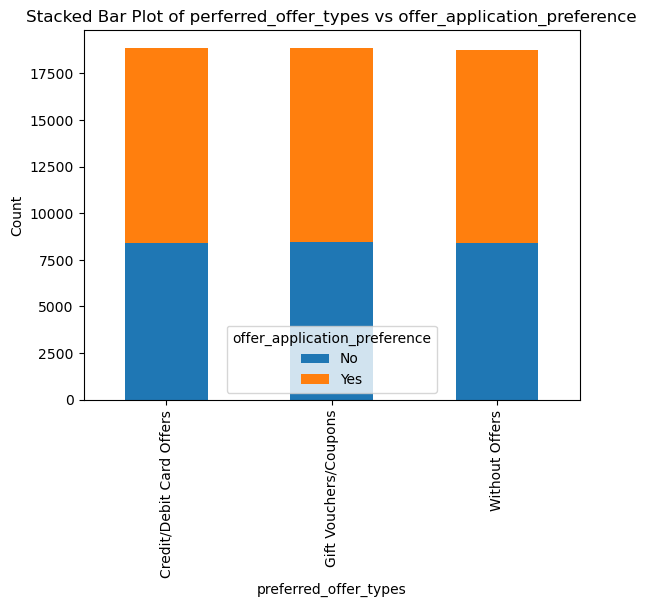

In [34]:
import matplotlib.pyplot as plt
df_off_fil=df[~df['preferred_offer_types'].isin(['unknown'])]
offer_table = pd.crosstab(df_off_fil['preferred_offer_types'], df_off_fil['offer_application_preference'])
offer_table.plot(kind='bar', stacked=True)

plt.title('Stacked Bar Plot of perferred_offer_types vs offer_application_preference')
plt.xlabel('preferred_offer_types')
plt.ylabel('Count')
plt.show()

--> check for correlation between preferred_offer_types and offer_application_preferences 

In [35]:
off_table = pd.crosstab(df_off_fil['preferred_offer_types'], df_off_fil['offer_application_preference'])

# Calculate Chi-squared statistic
chi2_stat, p_value, dof, expected = chi2_contingency(off_table)

# Calculate Cramer's V
n = contingency_table.sum().sum()  # Total number of observations
min_dim = min(contingency_table.shape) - 1  # Minimum dimension - 1
cramers_v = np.sqrt(chi2_stat / (n * min_dim))

print(f"Cramer's V: {cramers_v}")

Cramer's V: 0.0020059548485583858


-->This also has very weak correlation

In [36]:
df.head(10)

,customer_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,dataset,ID
0,CID6008,18,F,Village,Platinum Membership,2017-08-17,No,not applicable,Gift Vouchers/Coupons,?,...,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0,train,1
1,CID21057,32,F,City,Premium Membership,2017-08-28,Yes,CID21329,Gift Vouchers/Coupons,Desktop,...,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1.0,train,2
2,CID1926,44,F,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0,train,3
3,CID60316,37,M,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0,train,4
4,CID19506,31,F,City,No Membership,2017-09-12,No,not applicable,Credit/Debit Card Offers,Smartphone,...,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5.0,train,5
5,CID63253,13,M,City,Gold Membership,2016-01-08,No,not applicable,Gift Vouchers/Coupons,?,...,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,3.0,train,6
6,CID11679,21,M,Town,Gold Membership,2015-03-19,Yes,CID24708,Gift Vouchers/Coupons,Desktop,...,28.0,756.21,Yes,No,Yes,Solved in Follow-up,No reason specified,3.0,train,7
7,CID8058,42,M,unknown,No Membership,2016-07-12,Yes,CID56614,Credit/Debit Card Offers,Both,...,24.0,568.08,No,Yes,Yes,Unsolved,Poor Product Quality,5.0,train,8
8,CID33322,44,M,Village,Silver Membership,2016-12-14,No,not applicable,Without Offers,Smartphone,...,20.0,NaN,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,3.0,train,9
9,CID20483,45,F,Town,No Membership,2016-11-30,No,not applicable,Gift Vouchers/Coupons,?,...,28.0,706.23,No,Yes,Yes,No Information Available,Poor Customer Service,4.0,train,10


--> Convert the datatype of joining_date to datetime

In [37]:
df['joining_date']=pd.to_datetime(df['joining_date'])
print(df['joining_date'].dtype)

datetime64[ns]


#avg_frequency_login days- has values "error",null,numeric so can't convert the datatype now after dealing with the errors we have to change the datatype

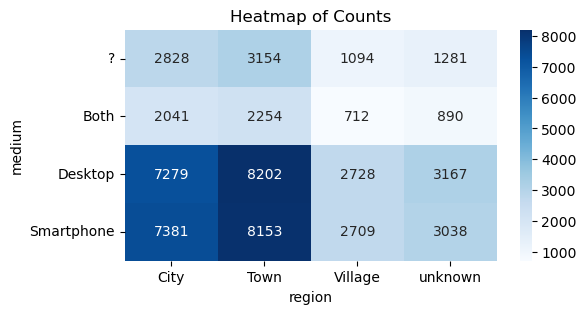

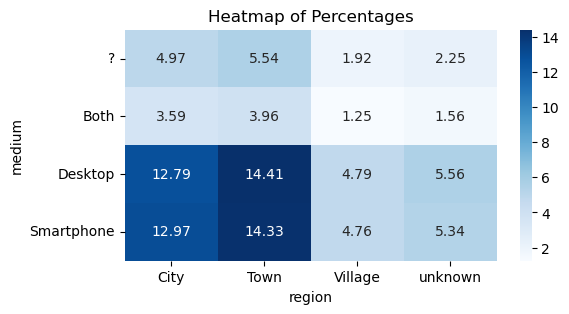

In [43]:
med_table = pd.crosstab(df['medium_of_operation'], df['region_category'])
import seaborn as sns
# Compute percentage table
percent_table = (med_table / med_table.sum().sum()) * 100

# 1. Heatmap of counts
plt.figure(figsize=(6, 3))
sns.heatmap(med_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Counts')
plt.xlabel('region')
plt.ylabel('medium')
plt.show()

# 2. Heatmap of percentages
plt.figure(figsize=(6, 3))
sns.heatmap(percent_table, annot=True, cmap='Blues', fmt='.2f')
plt.title('Heatmap of Percentages')
plt.xlabel('region')
plt.ylabel('medium')
plt.show()

In [44]:
mem_table = pd.crosstab(df_off_fil['medium_of_operation'], df_off_fil['region_category'])

# Calculate Chi-squared statistic
chi2_stat, p_value, dof, expected = chi2_contingency(mem_table)

# Calculate Cramer's V
n = mem_table.sum().sum()  # Total number of observations
min_di = min(mem_table.shape) - 1  # Minimum dimension - 1
cr_v = np.sqrt(chi2_stat / (n * min_di))

print(f"Cramer's V: {cr_v}")

Cramer's V: 0.007952201925472855


--> medium_of_operation and region_category have very weak correlation 
-->so just replace '?' with the unknown 
-->get the count of each unique entry in the medium_of_operation and percentage of them

In [45]:

df['medium_of_operation'] = df['medium_of_operation'].replace('?', 'unknown')

grouped = df.groupby('medium_of_operation')['internet_option'].apply(lambda x: list(set(x))).reset_index()
print(grouped)

med_count=df['medium_of_operation'].value_counts()
print(med_count)

val_c=df['medium_of_operation'].value_counts(dropna=False)
percent_med=(val_c/total_count)*100
per_med=percent_med.round(2)
print(per_med)


  medium_of_operation                    internet_option
0                Both  [Wi-Fi, Mobile_Data, Fiber_Optic]
1             Desktop  [Wi-Fi, Mobile_Data, Fiber_Optic]
2          Smartphone  [Wi-Fi, Mobile_Data, Fiber_Optic]
3             unknown  [Wi-Fi, Mobile_Data, Fiber_Optic]
Desktop       21376
Smartphone    21281
unknown        8357
Both           5897
Name: medium_of_operation, dtype: int64
Desktop       37.56
Smartphone    37.39
unknown       14.68
Both          10.36
Name: medium_of_operation, dtype: float64


--> get the count of unique entries in internet_option column and percentage values

In [47]:
internet_count=df['internet_option'].value_counts()
print(internet_count)

val_coun=df['internet_option'].value_counts(dropna=False)
perc_inter=(val_coun/total_count)*100
per_inter=perc_inter.round(2)
print(per_inter)

Wi-Fi          19012
Fiber_Optic    18983
Mobile_Data    18916
Name: internet_option, dtype: int64
Wi-Fi          33.41
Fiber_Optic    33.36
Mobile_Data    33.24
Name: internet_option, dtype: float64


--> check for the count of unique values below zero and then check for the percentage 

In [48]:
val_bel=df[df['days_since_last_login']<0]['days_since_last_login']
uni_co=val_bel.value_counts()
print(uni_co)


-999    3021
Name: days_since_last_login, dtype: int64


In [51]:
total_count=len(df['days_since_last_login'])
less_zero=(df['days_since_last_login']<0).sum()
per_less_zero=(less_zero/total_count)*100
print(per_less_zero)

5.3082883801022644


--> now replace the '-999' with null values and find the mean of the days_since_last_login and then replace them with the mean value

In [53]:
df['days_since_last_login']=df['days_since_last_login'].replace(-999,np.nan)
days_null=df['days_since_last_login'].isna().sum()
print(days_null)

3021


In [93]:
mean_days=df['days_since_last_login'].mean()
mean_round_days=round(mean_days)
print(mean_round_days)
df['days_since_last_login']=df['days_since_last_login'].fillna(mean_round_days)
null_count=df['days_since_last_login'].isna().sum()
print(null_count)

13
0


#replaced  -999 with null values should cross analyze with avg_freq_login_days
#avg_time_spent has negative values it  
-->check for the distinct values and their duplicates in avg_time_spent and get the percentage of the total no.of negative values 

In [56]:
time_bel=df[df['avg_time_spent']<0]['avg_time_spent']
time_co=time_bel.value_counts()
print(time_co)

-936.744818     1
-1414.096503    1
-883.098569     1
-1124.392093    1
-643.299066     1
               ..
-907.296159     1
-785.062272     1
-746.651692     1
-919.205029     1
-565.774744     1
Name: avg_time_spent, Length: 2650, dtype: int64


In [57]:
com_count=len(df['avg_time_spent'])
below_zero=(df['avg_time_spent']<0).sum()
per_below_zero=(below_zero/total_count)*100
print(per_below_zero)

4.65639331587918


#format the decimal palces to 2 and also check what to fill inplace of negative values 

In [59]:
df['avg_time_spent']=df['avg_time_spent'].round(2)
df.head(10)

,customer_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,dataset,ID
0,CID6008,18,F,Village,Platinum Membership,2017-08-17,No,not applicable,Gift Vouchers/Coupons,unknown,...,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0,train,1
1,CID21057,32,F,City,Premium Membership,2017-08-28,Yes,CID21329,Gift Vouchers/Coupons,Desktop,...,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1.0,train,2
2,CID1926,44,F,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0,train,3
3,CID60316,37,M,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0,train,4
4,CID19506,31,F,City,No Membership,2017-09-12,No,not applicable,Credit/Debit Card Offers,Smartphone,...,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5.0,train,5
5,CID63253,13,M,City,Gold Membership,2016-01-08,No,not applicable,Gift Vouchers/Coupons,unknown,...,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,3.0,train,6
6,CID11679,21,M,Town,Gold Membership,2015-03-19,Yes,CID24708,Gift Vouchers/Coupons,Desktop,...,28.0,756.21,Yes,No,Yes,Solved in Follow-up,No reason specified,3.0,train,7
7,CID8058,42,M,unknown,No Membership,2016-07-12,Yes,CID56614,Credit/Debit Card Offers,Both,...,24.0,568.08,No,Yes,Yes,Unsolved,Poor Product Quality,5.0,train,8
8,CID33322,44,M,Village,Silver Membership,2016-12-14,No,not applicable,Without Offers,Smartphone,...,20.0,NaN,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,3.0,train,9
9,CID20483,45,F,Town,No Membership,2016-11-30,No,not applicable,Gift Vouchers/Coupons,unknown,...,28.0,706.23,No,Yes,Yes,No Information Available,Poor Customer Service,4.0,train,10


--> find min and max value of avg_time_spent column

In [60]:
time_min=df['avg_time_spent'].min()
time_max=df['avg_time_spent'].max()
print(time_min,time_max)

-2814.11 3350.06


-->checking for outliers in avg_time_spent for each unique entry with the medium_of_operation 

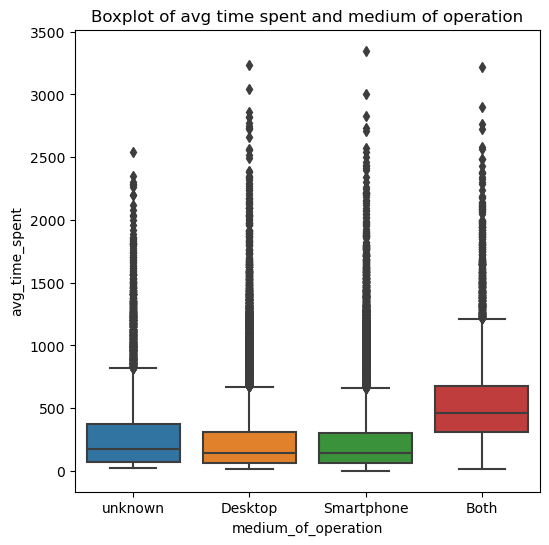

In [64]:
df_time_medium=df[df['avg_time_spent']>=0]
plt.figure(figsize=(6,6))
sns.boxplot(x='medium_of_operation',y='avg_time_spent',data=df_time_medium)
plt.title('Boxplot of avg time spent and medium of operation')
plt.show()

In [66]:
avg_time=df_time_medium.groupby('medium_of_operation')['avg_time_spent'].mean().reset_index()
avg_time.columns=['medium_of_operations','average_time_spent']
print(avg_time)

  medium_of_operations  average_time_spent
0                 Both          564.306804
1              Desktop          256.308476
2           Smartphone          255.303576
3              unknown          290.265994


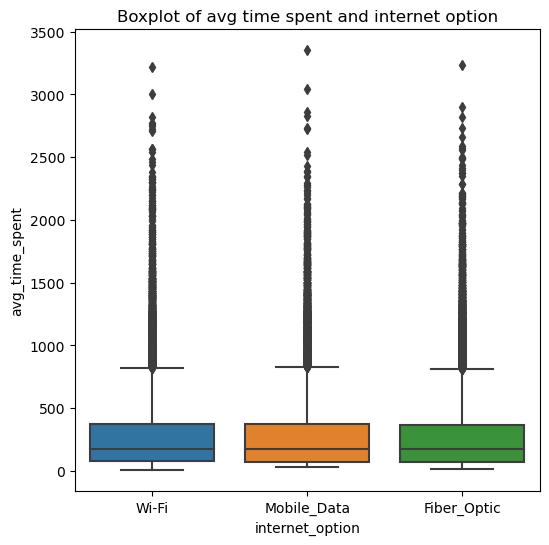

In [67]:
plt.figure(figsize=(6,6))
sns.boxplot(x='internet_option',y='avg_time_spent',data=df_time_medium)
plt.title('Boxplot of avg time spent and internet option')
plt.show()

In [69]:
avg_time_inter=df_time_medium.groupby('internet_option')['avg_time_spent'].mean().reset_index()
avg_time_inter.columns=['internet_option','average_time_spent']
print(avg_time_inter)

  internet_option  average_time_spent
0     Fiber_Optic          291.654576
1     Mobile_Data          293.771537
2           Wi-Fi          293.572643


In [70]:
#Check for the average time spent mean grouped up by internet_option and medium_of_operation

In [77]:
avg_val=df_time_medium.groupby(['internet_option','medium_of_operation'])['avg_time_spent'].mean().reset_index()
avg_val.columns=['internet_option','medium_of_opertion','average time']
print(avg_val)

   internet_option medium_of_opertion  average time
0      Fiber_Optic               Both    554.461132
1      Fiber_Optic            Desktop    254.413126
2      Fiber_Optic         Smartphone    255.783400
3      Fiber_Optic            unknown    291.953288
4      Mobile_Data               Both    573.265898
5      Mobile_Data            Desktop    257.564354
6      Mobile_Data         Smartphone    251.899622
7      Mobile_Data            unknown    295.254832
8            Wi-Fi               Both    565.309235
9            Wi-Fi            Desktop    256.945588
10           Wi-Fi         Smartphone    258.230677
11           Wi-Fi            unknown    283.616997


In [81]:
#try to replace avg_time_spent negative values with the average of unique combination of medium_of_operation and internet_option it afterwards 
#or fill values with zero and the percentage is approx 4.8%

--> check for the unique values 

In [83]:
spec_dis_uni=df['used_special_discount'].unique()
print(spec_dis_uni)
spe_dis_null=df['used_special_discount'].isnull().sum()
print(spe_dis_null)
off_pre_null=df['offer_application_preference'].isnull().sum()
print(off_pre_null)
off_pre_uni=df['offer_application_preference'].unique()
print(off_pre_uni)
com_null=df['past_complaint'].isnull().sum()
print(com_null)
com_uni=df['past_complaint'].unique()
print(com_uni)


['Yes' 'No']
0
0
['Yes' 'No']
0
['No' 'Yes']


In [84]:
com_stat_uni=df['complaint_status'].unique()
print(com_stat_uni)
com_stat_null=df['complaint_status'].isnull().sum()
print(com_stat_null)
val_cou=df['complaint_status'].value_counts()
percentage=(val_cou/val_cou.sum())*100
print(percentage)

['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']
0
Not Applicable              50.169563
Solved in Follow-up         12.593348
No Information Available    12.475620
Unsolved                    12.468591
Solved                      12.292878
Name: complaint_status, dtype: float64


In [85]:
feed_null=df['feedback'].isnull().sum()
print(feed_null)
feedback_uni=df['feedback'].value_counts()
print(feedback_uni)
fee_cou=df['feedback'].value_counts()
fee_per=(fee_cou/fee_cou.sum())*100
print(fee_per)


0
Poor Product Quality        9724
No reason specified         9713
Too many ads                9680
Poor Customer Service       9662
Poor Website                9572
Reasonable Price            2205
Products always in Stock    2160
Quality Customer Care       2115
User Friendly Website       2080
Name: feedback, dtype: int64
Poor Product Quality        17.086328
No reason specified         17.066999
Too many ads                17.009014
Poor Customer Service       16.977386
Poor Website                16.819244
Reasonable Price             3.874471
Products always in Stock     3.795400
Quality Customer Care        3.716329
User Friendly Website        3.654829
Name: feedback, dtype: float64


In [86]:
tr_df=df[df['dataset']=='train']
churn_score_counts=tr_df['churn_risk_score'].value_counts()
print(churn_score_counts)

 3.0    10424
 4.0    10185
 5.0     9827
 2.0     2741
 1.0     2652
-1.0     1163
Name: churn_risk_score, dtype: int64


In [87]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,ID
count,56911.000000,53890.000000,56911.000000,56911.000000,51505.000000,36992.000000,56911.000000
mean,37.036355,12.734904,243.704240,29287.618994,686.563762,3.463397,28456.000000
std,15.885146,5.552976,400.262319,19466.710286,193.398290,1.409661,16428.934922
min,10.000000,1.000000,-2814.110000,800.460000,-760.661236,-1.000000,1.000000
25%,23.000000,9.000000,59.830000,14195.630000,615.970000,3.000000,14228.500000
50%,37.000000,13.000000,161.620000,27560.380000,697.820000,4.000000,28456.000000
75%,51.000000,17.000000,355.460000,40896.595000,764.280000,5.000000,42683.500000
max,64.000000,26.000000,3350.060000,99995.030000,2069.069761,5.000000,56911.000000


In [88]:
frq_null=df['avg_frequency_login_days'].isnull().sum()
print(frq_null)
frq_dtype=df['avg_frequency_login_days'].dtype
print(frq_dtype)


0
object


In [91]:
df['avg_frequency_login_days']=pd.to_numeric(df['avg_frequency_login_days'],errors='coerce')
count_less=(df['avg_frequency_login_days']<0).sum()
print(count_less)
freq_min=df['avg_frequency_login_days'].min()
freq_max=df['avg_frequency_login_days'].max()
print(freq_min,freq_max)

1078
-46.01029532699472 79.46992661791744


In [92]:
df['avg_frequency_login_days']=df['avg_frequency_login_days'].round(2)
df['avg_frequency_login_days']=pd.to_numeric(df['avg_frequency_login_days'],errors='coerce')
print(df.dtypes)

customer_id                             object
age                                      int64
gender                                  object
region_category                         object
membership_category                     object
joining_date                    datetime64[ns]
joined_through_referral                 object
referral_id                             object
preferred_offer_types                   object
medium_of_operation                     object
internet_option                         object
days_since_last_login                  float64
avg_time_spent                         float64
avg_transaction_value                  float64
avg_frequency_login_days               float64
points_in_wallet                       float64
used_special_discount                   object
offer_application_preference            object
past_complaint                          object
complaint_status                        object
feedback                                object
churn_risk_sc

In [96]:
#replace the negative values with days_since_last_login values
df.loc[df['avg_frequency_login_days']<0,'avg_frequency_login_days']=df['days_since_last_login']
count_less=(df['avg_frequency_login_days']<0).sum()
print(count_less)
freq_min=df['avg_frequency_login_days'].min()
freq_max=df['avg_frequency_login_days'].max()
print(freq_min,freq_max)

0
0.01 79.47


In [98]:
#what to fill out the columns "with error " those are replaced with null values at present 
#think of it

In [115]:
avg_login_null=df['avg_frequency_login_days'].isnull().sum()
print(avg_login_null)

5437


In [99]:
#points_in_wallet 
wallet_null=df['points_in_wallet'].isnull().sum()
print(wallet_null)
wallet_dtype=df['points_in_wallet'].dtype
print(wallet_dtype)

5406
float64


In [100]:
null_percent_cat=df.groupby('membership_category')['points_in_wallet'].apply(lambda x:x.isnull().mean()*100)
print(null_percent_cat)

membership_category
Basic Membership       9.442751
Gold Membership        9.492651
No Membership          9.581041
Platinum Membership    9.560570
Premium Membership     9.164223
Silver Membership      9.676717
Name: points_in_wallet, dtype: float64


In [101]:
min_max_group=df.groupby('membership_category')['points_in_wallet'].agg(['min','max']).reset_index()
print(min_max_group)

   membership_category         min          max
0     Basic Membership -549.357498  1816.933696
1      Gold Membership -760.661236  2069.069761
2        No Membership -506.256716  1783.307652
3  Platinum Membership -333.267016  2019.671602
4   Premium Membership -324.909290  1763.351594
5    Silver Membership -465.289977  1755.455512


In [104]:
points_neg=(df['points_in_wallet']<0).sum()
print(points_neg)
total_values=df['points_in_wallet'].notna().sum()
points_neg_per=(points_neg/total_values)*100
print(points_neg_per)

197
0.3824871371711484


In [106]:
df.loc[df['points_in_wallet']<0,'points_in_wallet']=0
points_neg=(df['points_in_wallet']<0).sum()
print(points_neg)

0


In [110]:
df['points_in_wallet']=df['points_in_wallet'].round(2)

In [112]:
med_per_mem=df.groupby('membership_category')['points_in_wallet'].median()
print(med_per_mem)

membership_category
Basic Membership       626.47
Gold Membership        724.30
No Membership          627.26
Platinum Membership    760.21
Premium Membership     759.46
Silver Membership      715.42
Name: points_in_wallet, dtype: float64


In [113]:
df['points_in_wallet'] = df.apply(
    lambda row: med_per_mem[row['membership_category']] if pd.isna(row['points_in_wallet']) else row['points_in_wallet'],
    axis=1
)
wallet_null=df['points_in_wallet'].isnull().sum()
print(wallet_null)

0


In [114]:
#replaced the points in wallet with the median values grouped up by membership category coloumn 

In [116]:
#drop the avg_login_freq with Error values
df.dropna(subset=['avg_frequency_login_days'], inplace=True)
frq_null=df['avg_frequency_login_days'].isnull().sum()
print(frq_null)
frq_dtype=df['avg_frequency_login_days'].dtype
print(frq_dtype)

0
float64


In [117]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,ID
count,51474.000000,51474.000000,51474.000000,51474.000000,51474.000000,51474.000000,33470.000000,51474.000000
mean,37.033085,12.754944,244.188810,29281.025159,16.449679,687.713932,3.461757,28432.705444
std,15.893395,5.404665,399.892806,19440.125753,8.395430,182.417699,1.411195,16429.855368
min,10.000000,1.000000,-2281.240000,800.460000,0.010000,0.000000,-1.000000,1.000000
25%,23.000000,9.000000,59.712500,14245.330000,10.000000,624.470000,3.000000,14201.250000
50%,37.000000,13.000000,161.770000,27567.435000,16.000000,700.660000,4.000000,28397.000000
75%,51.000000,16.000000,355.157500,40875.382500,23.000000,760.210000,5.000000,42659.750000
max,64.000000,26.000000,3350.060000,99926.550000,79.470000,2069.070000,5.000000,56910.000000


In [118]:
df['avg_time_spent'] = df['avg_time_spent'].clip(lower=0)
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,ID
count,51474.000000,51474.000000,51474.000000,51474.000000,51474.000000,51474.000000,33470.000000,51474.000000
mean,37.033085,12.754944,279.521641,29281.025159,16.449679,687.713932,3.461757,28432.705444
std,15.893395,5.404665,332.833836,19440.125753,8.395430,182.417699,1.411195,16429.855368
min,10.000000,1.000000,0.000000,800.460000,0.010000,0.000000,-1.000000,1.000000
25%,23.000000,9.000000,59.712500,14245.330000,10.000000,624.470000,3.000000,14201.250000
50%,37.000000,13.000000,161.770000,27567.435000,16.000000,700.660000,4.000000,28397.000000
75%,51.000000,16.000000,355.157500,40875.382500,23.000000,760.210000,5.000000,42659.750000
max,64.000000,26.000000,3350.060000,99926.550000,79.470000,2069.070000,5.000000,56910.000000


# Outlier Detection:

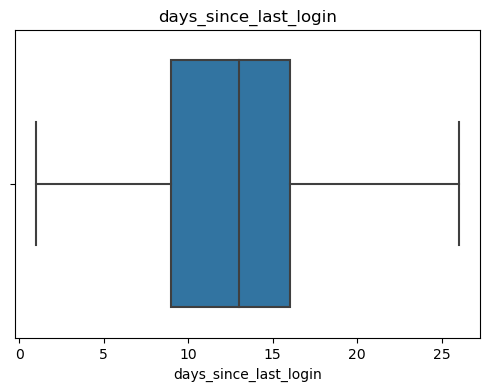

In [119]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['days_since_last_login'])
plt.title('days_since_last_login')
plt.xlabel('days_since_last_login')
plt.show()

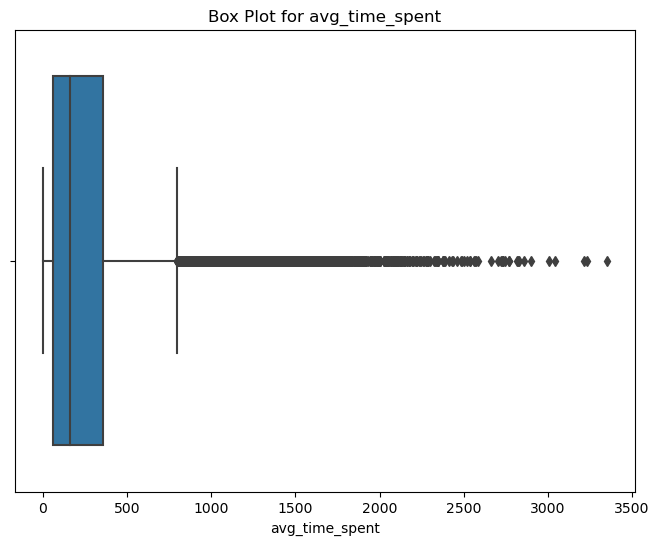

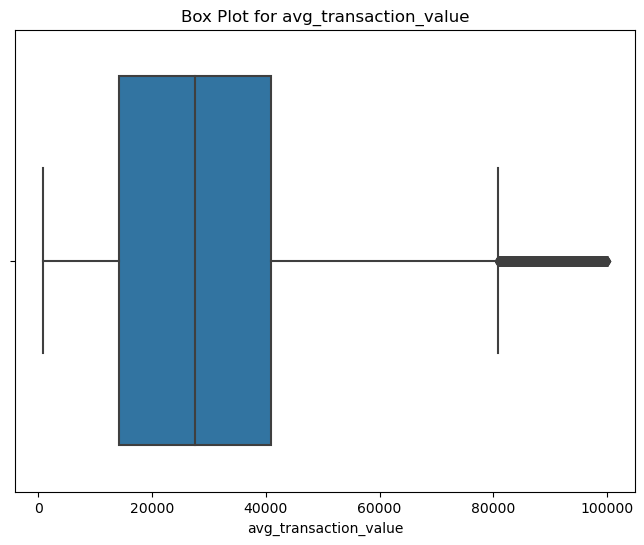

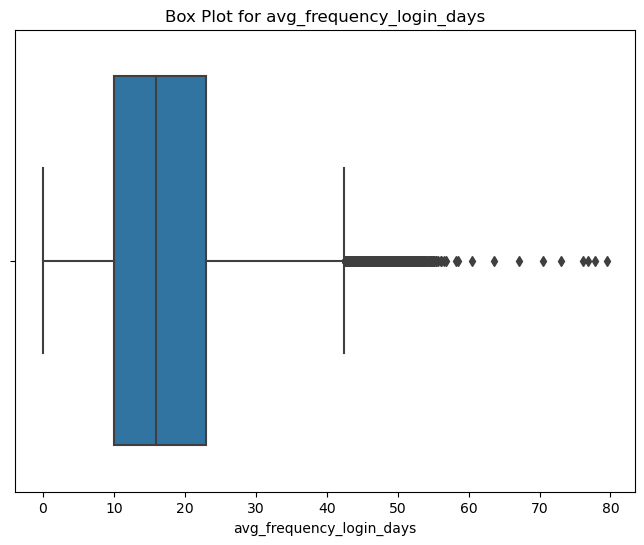

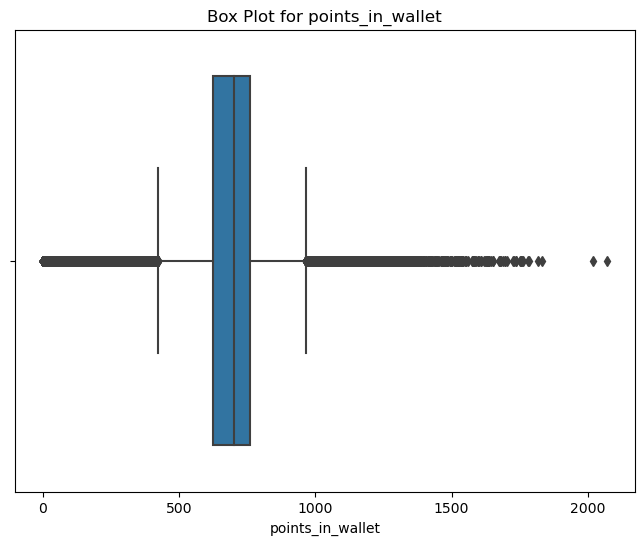

In [122]:
for col in ['avg_time_spent', 'avg_transaction_value','avg_frequency_login_days','points_in_wallet']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

In [123]:
columns = ['days_since_last_login', 'avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet']

# Calculate IQR and identify outliers
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col + '_outlier'] = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    # Calculate percentage of outliers
    total_count = len(df)
    outlier_count = df[col + '_outlier'].sum()
    outlier_percentage = (outlier_count / total_count) * 100
    
    print(f'Column: {col}')
    print(f'Percentage of outliers: {outlier_percentage:.2f}%')

Column: days_since_last_login
Percentage of outliers: 0.00%
Column: avg_time_spent
Percentage of outliers: 8.46%
Column: avg_transaction_value
Percentage of outliers: 3.06%
Column: avg_frequency_login_days
Percentage of outliers: 1.03%
Column: points_in_wallet
Percentage of outliers: 12.70%


In [ ]:
# days_since_last_login doesn't have outliers 
#avg_time_spent and points_in_wallet have more than 5% outliers so we don't drop them 
#should we drop the outliers columns 

In [129]:
#outliers should we keep or drop them down 


# VARIABLE ANALYSIS

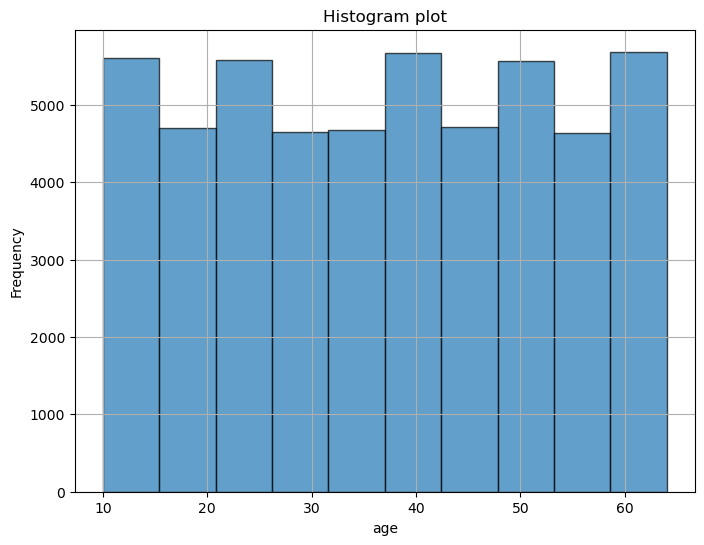

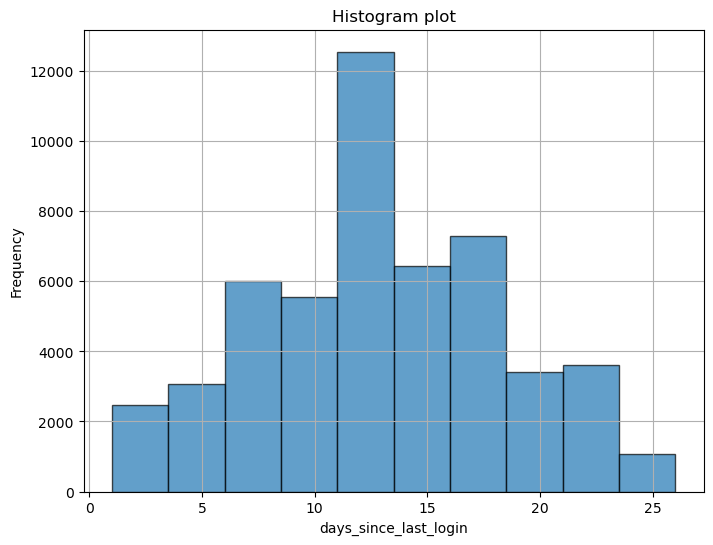

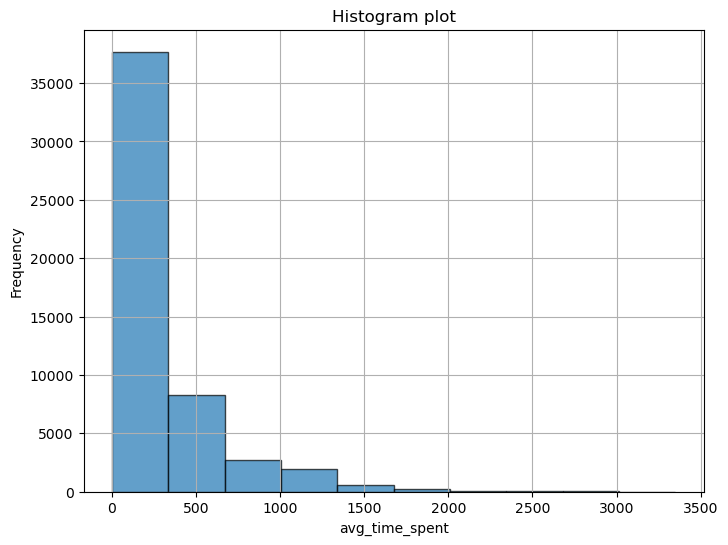

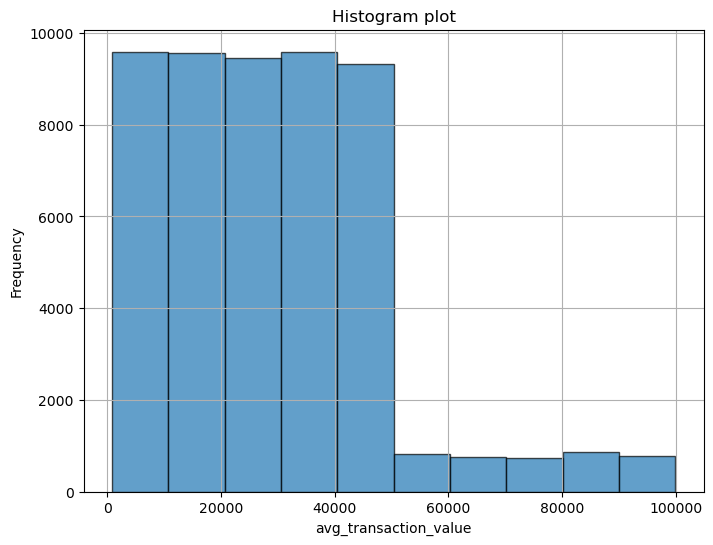

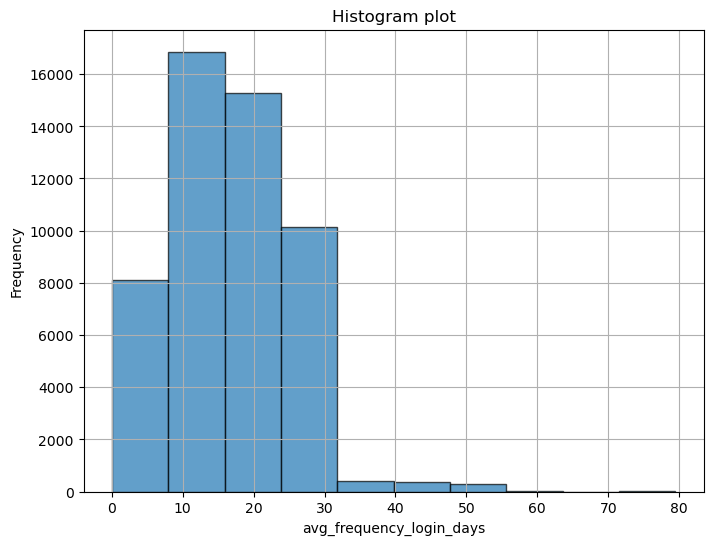

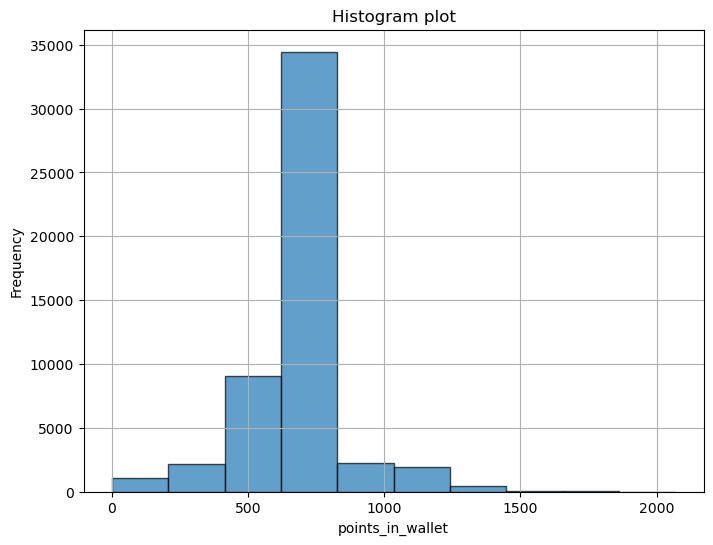

In [131]:

colum = ['age','days_since_last_login','avg_time_spent', 'avg_transaction_value','avg_frequency_login_days','points_in_wallet']

# Plot histograms
for col in colum:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=10, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram plot')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

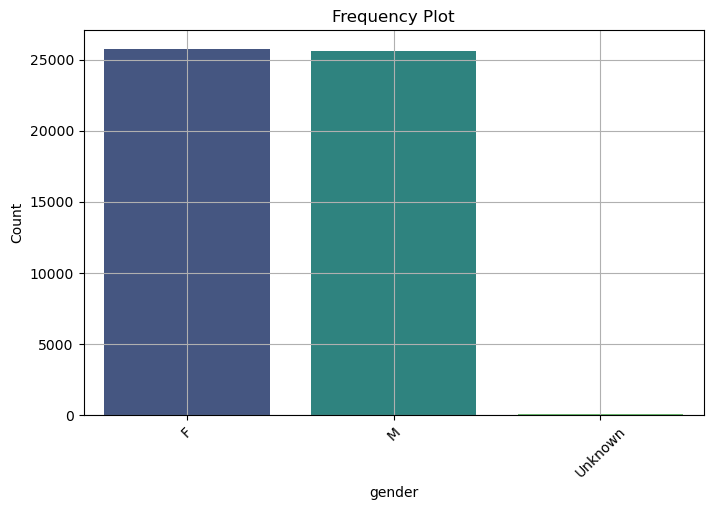

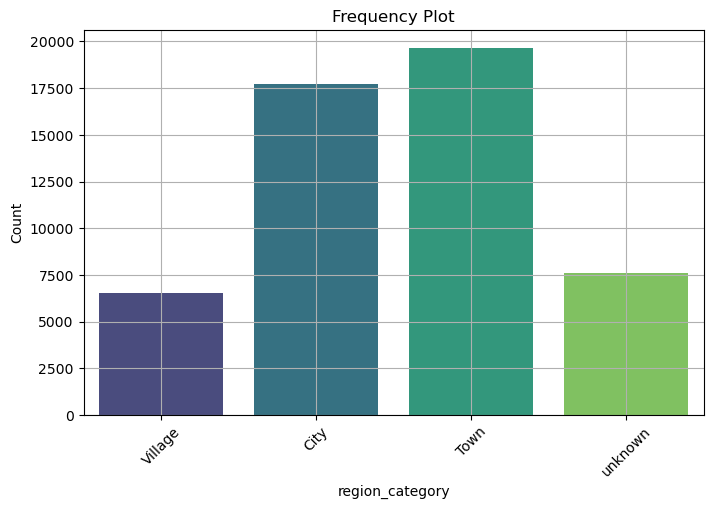

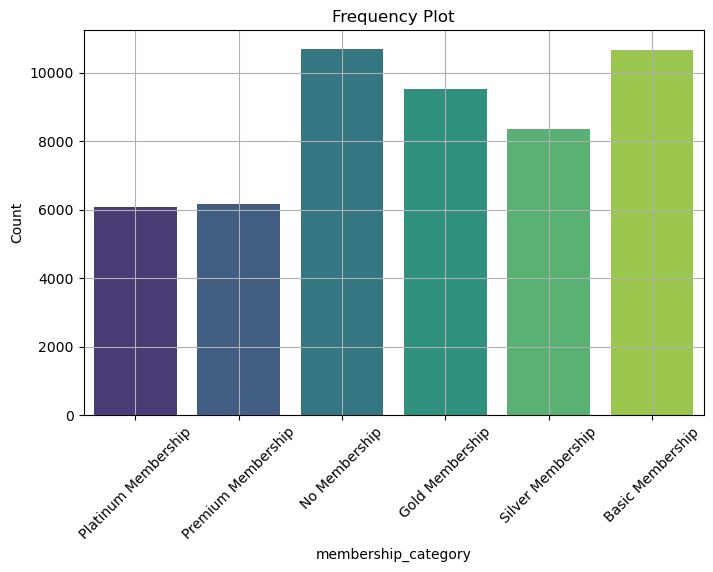

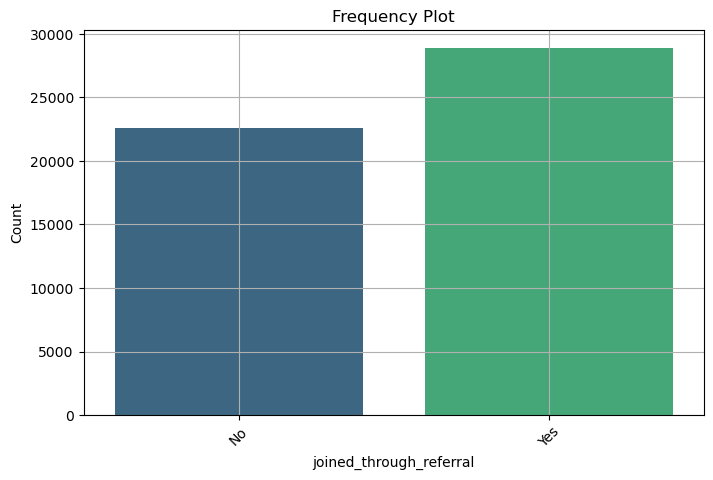

In [132]:
columns = ['gender','region_category','membership_category','joined_through_referral']

# Plot frequency plots
for col in columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f'Frequency Plot')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.grid(True)
    plt.show()

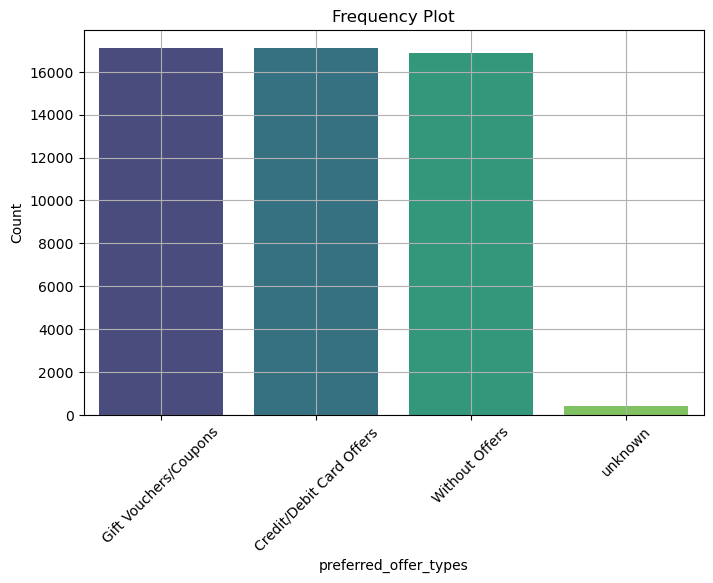

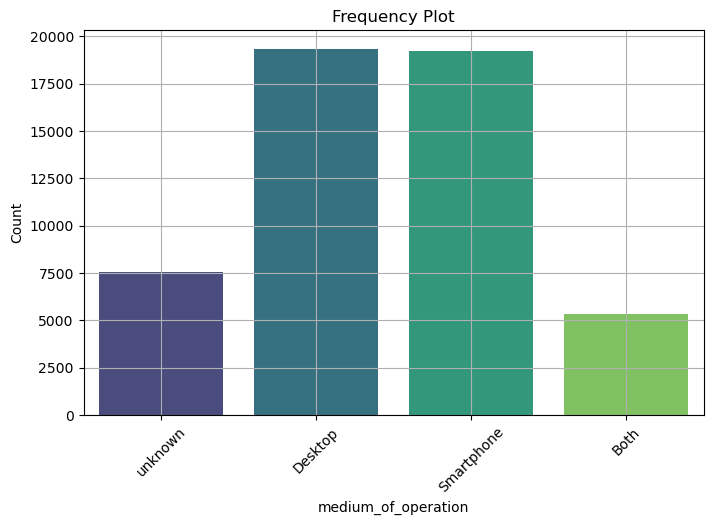

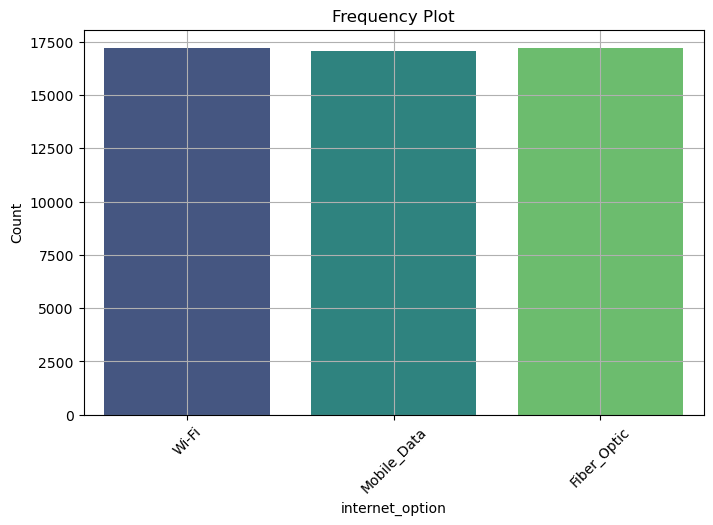

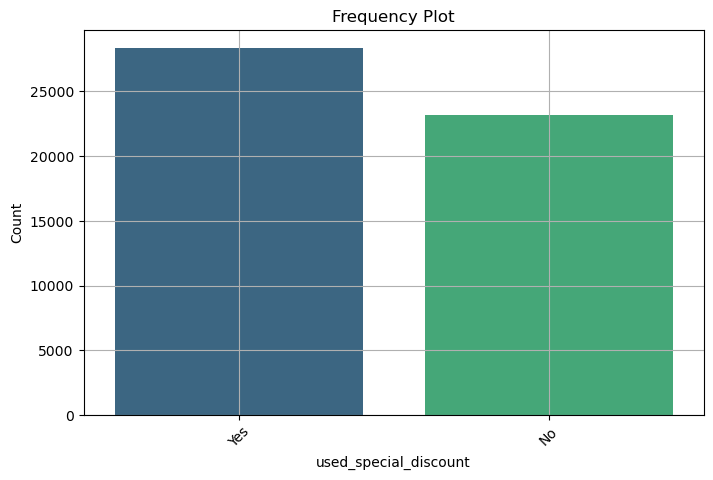

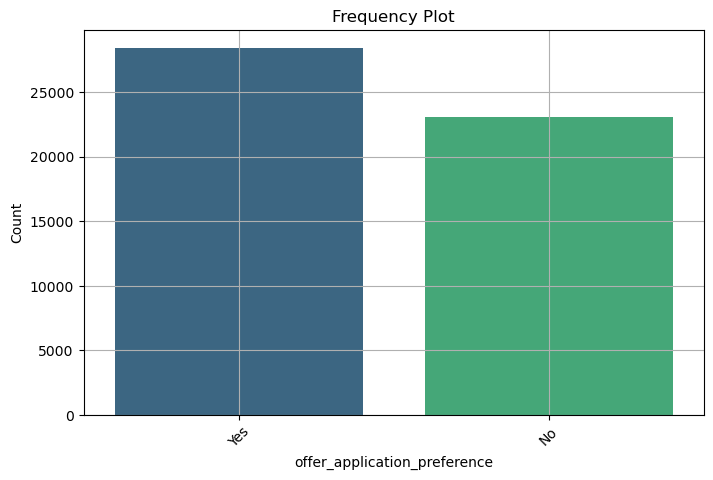

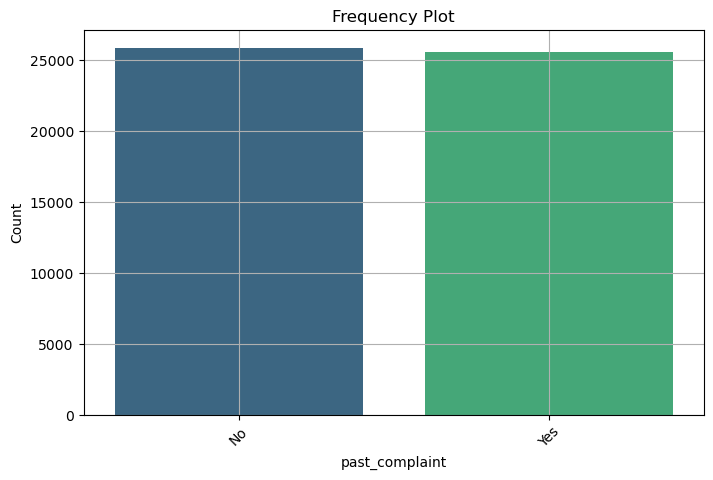

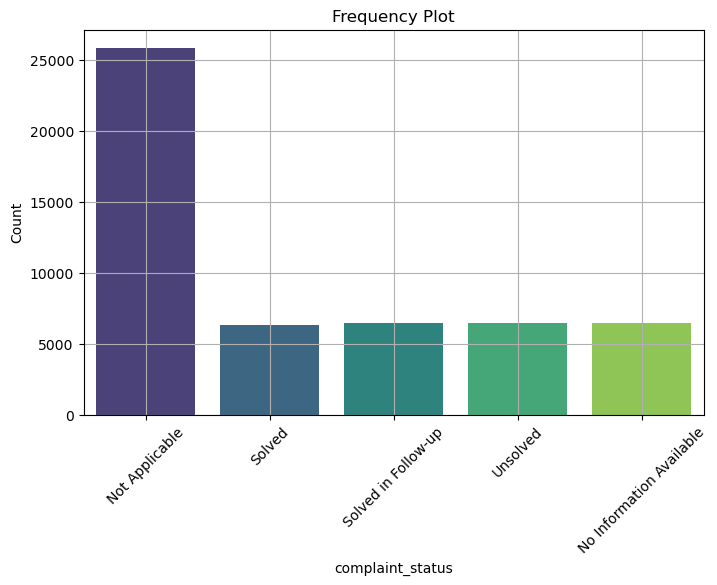

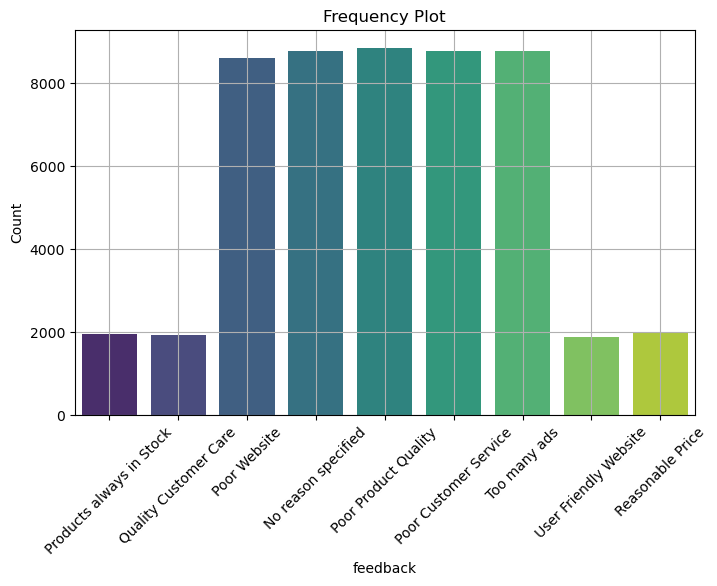

In [128]:
cat_columns = ['preferred_offer_types','medium_of_operation','internet_option','used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback']

# Plot frequency plots
for col in cat_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f'Frequency Plot')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.grid(True)
    plt.show()

In [133]:
#multi variable anaylisis

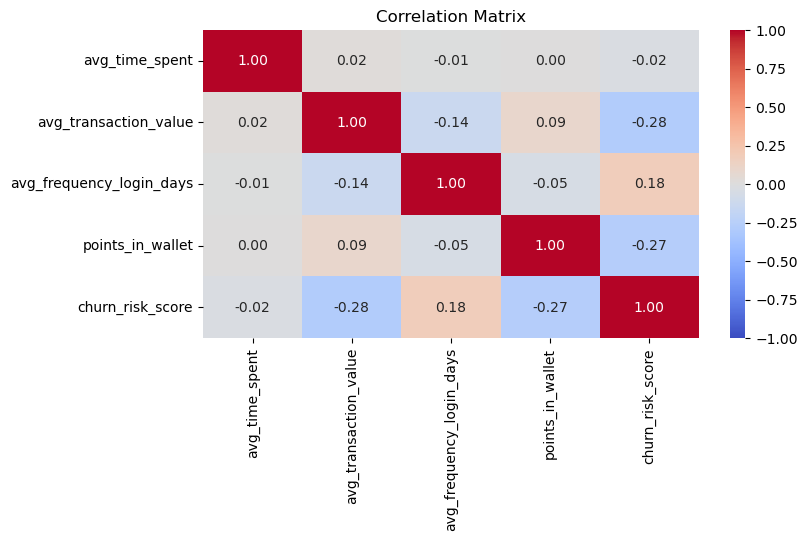

In [135]:
continuous_columns = ['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days','points_in_wallet','churn_risk_score']
df_continuous = df[continuous_columns]
correlation_matrix = df_continuous.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [137]:
import pandas as pd 
df=pd.read_csv('combined_dataset.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56911 entries, 0 to 56910
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   56911 non-null  object 
 1   Name                          56911 non-null  object 
 2   age                           56911 non-null  int64  
 3   gender                        56911 non-null  object 
 4   security_no                   56911 non-null  object 
 5   region_category               48535 non-null  object 
 6   membership_category           56911 non-null  object 
 7   joining_date                  56911 non-null  object 
 8   joined_through_referral       56911 non-null  object 
 9   referral_id                   56911 non-null  object 
 10  preferred_offer_types         56464 non-null  object 
 11  medium_of_operation           56911 non-null  object 
 12  internet_option               56911 non-null  object 
 13  l

In [138]:
df_points=df[df['points_in_wallet']<0]
df_points
print(df_points['churn_risk_score'].value_counts())
 
df_points=df[df['points_in_wallet'].isnull()]
df_points
print(df_points['churn_risk_score'].value_counts())

 5.0    60
 4.0    33
 3.0    24
 2.0     9
 1.0     8
-1.0     2
Name: churn_risk_score, dtype: int64
 3.0    975
 5.0    945
 4.0    925
 1.0    259
 2.0    237
-1.0    102
Name: churn_risk_score, dtype: int64


In [140]:
df_points=df['points_in_wallet']
df_points
print(df_points['churn_risk_score'].value_counts())
 
df_points=df[df['points_in_wallet'].isnull()]
df_points
print(df_points['churn_risk_score'].value_counts())

KeyError: 'churn_risk_score'

In [142]:

import numpy as np
total_cou=len(df)

val_count=df['churn_risk_score'].value_counts()
percent=(val_count/total_cou)*100
percentage=percent.round(2)
percentage

 3.0    18.32
 4.0    17.90
 5.0    17.27
 2.0     4.82
 1.0     4.66
-1.0     2.04
Name: churn_risk_score, dtype: float64

In [ ]:
#cohot analysis 
#variables outlier treatment first 